# Avaliando modelos 

Durante a criação de um modelo é importante ter uma boa métrica de avaliação do modelo para garantir um bom aprendizado de máquina.

**Figura 1**

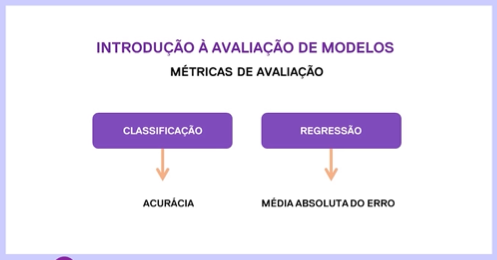

Fonte: Lead Dell

Para clasificação usamos a **acurácia** que tem como objetivo calcular o número de predições e calcular a taxa de acerto da sua predição, ou seja, se o **classificador conseguiu classificar corretamente**. É uma porcentagem dada pelo número de acerto dividido pelo total de elementos passados pelo classificador.

>Dentre todos as classificações, quantas o modelo classificou corretamente. A distribuição não uniforme dos dados, pode avaliar incorretamente um modelo.


Para a regressão temos a média absoluta do erro, onde a diferença para cada elemento entre a regressão o valor que a regressão retornou menor o valor real em modulo.

> Mensura dentre todas as classificações de classe que o modelo fez, calculando a média do somatório dovalor que a regressão retornou menor o valor real em modulo;

Para dados de grandezas diferente não é possivel fazer essa comparação.

**Figura 2**

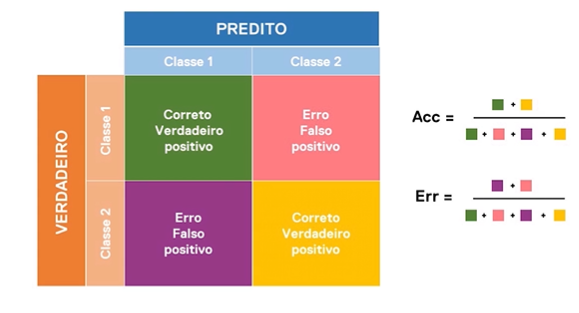

Fonte: Lead Dell

Para ambos métodos de validação existe problemas podem dar alguns tipo de vies para a validação do método. Para a acurácia dados desbalanceados pode dificultar a intrepretação dos dados obtidos. Assim, a escolha adequadra da métrica depende de fatores presentes no problema.

Causas de uma má perfomace do classificador
- ***Erros em atributos***
- ***Overfitting***
- ***Desbalanceamento das classes***

## Modelos Dummy

São modelos que tentam ser classificadores bem simples que atuam sobre regras simples, mas que servem para comparar se o classificador está sendo bom o suficiente ou se o seu desempenho está parecido com um classificador Dummy, o que não é nosso objetivo.

O **classificador Dammy** seria um verifcador de sanidade do modelo, se construir uma técnica do modelo bem simples pode-se obter resultados parecidos com o classificador real. Assim o classificador dammy vai tentar classificar o modelo de uma forma mais simples e se o modelo proposto for próximo do modelo dammy, então o modelo não é interessante

> **Regra de ouro**: se o modelo possui uma acurácia menor que 50%, isso implica em um modelo ruim.


**Figura 3**

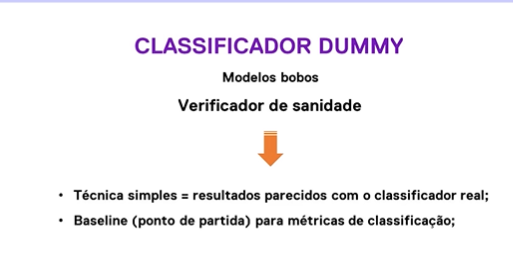

Fonte: Lead Dell

Por tanto, o classificador dummy é usado como métrica de partida de classificação. 

### Tipos de classificadores Dummy

- most_frequent: Retorna a classe mais frequente.
- Uniform: Retorna de forma aleatório uma classe que está sendo avaliado.
- stratified: Aleatório com distribuição igual nos dados de treino, tentando distribuir aleatóriamente as classes com base nos dados de treino.
- constant: Retorna apenas uma classe definida pelo usuário.

### Tipos de regressores Dummy


- Mean: Retornar a média dos rótulos de treinamento
- Median: Mediana das saídas do treinamento
- Quantile: Quartil das saídas de treinamento. 0 para minimo, 0,5 para a média e 1 para máximo.
- constant: Contante definida pelo usuário

## Implementação das métricas Dummy

In [1]:
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.datasets import load_iris, load_boston

In [2]:
X,y = load_iris(return_X_y=True)

In [3]:
# Classificador Dammy comm a estratédia estratificada
dc = DummyClassifier(strategy='stratified')
dc.fit(X,y)#treinar o classificador dammy
dc.score(X,y)

0.30666666666666664

In [5]:
X,y = load_boston(return_X_y=True)

In [6]:
dr = DummyRegressor(strategy='mean')
dr.fit(X,y)
dr.score(X,y)

0.0

## Matriz de confusão

Técnica de avaliação que verifica como os erros estão acontecendo. Nele a tabela faz ser possivel visualizar as frequencias de classificação para cada classe do modelo. 

Cada linha da matriz significa uma classe e cada coluna o que foi predito.

**Fonte 5**

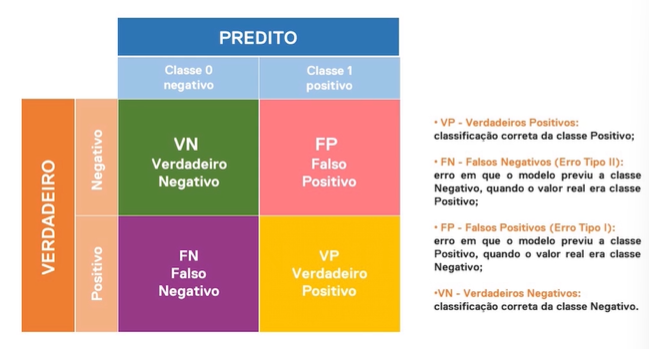

Fonte: Lead Dell

Os elementos presente na diagonal principal são os valores verdadeiros, ou seja, os valores que estão na linha e coluna com o mesmo número foram classificados corretamente, isso paar dados binários, mas é possível extender essa lógica.

**Figura 6**

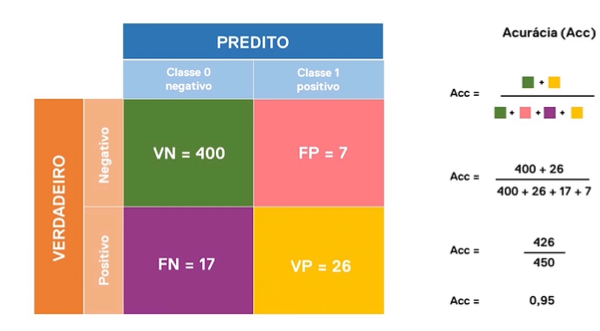

Fonte: Lead Dell

**Figura 7**

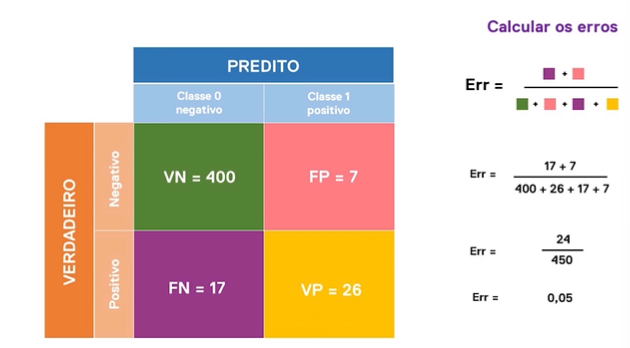

Fonte: Lead Dell

## Implementação da matriz de confusão

In [10]:
from sklearn.dummy import DummyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
X,y = load_breast_cancer(return_X_y=True)


In [12]:
# Classificador Dammy com estrátegia estratificada
dc = DummyClassifier(strategy='stratified')
dc.fit(X,y)
# Imprime  matriz de confusão comparando os rotulos reais e os preditos
confusion_matrix(y,dc.predict(X))

array([[ 75, 137],
       [168, 189]], dtype=int64)

o código retorna a matriz de confusão.

## Recall e precisão

Recall ou sensiticidade é comumente utilizada para aplicações médicas, tendo o seguinte calculo:

**Figura 8**

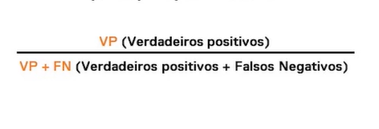

Fonte: Lead Dell

Essa métrica leva consideração os falsos negativos, o que é equivalente a dizer que alguem não esta doente mas essa pessoa está doente.

O método da precisão é utilizado para sistemas de recomendação. Possui o seguinte calculo

**Figura 9**

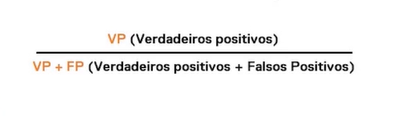

Fonte: Lead Dell

leva em consideração os falsos positivos.

## Implementação Recall e Precisão

In [13]:
print(classification_report(y,dc.predict(X)))

              precision    recall  f1-score   support

           0       0.41      0.38      0.40       212
           1       0.65      0.67      0.66       357

    accuracy                           0.56       569
   macro avg       0.53      0.53      0.53       569
weighted avg       0.56      0.56      0.56       569



**Figura 10**

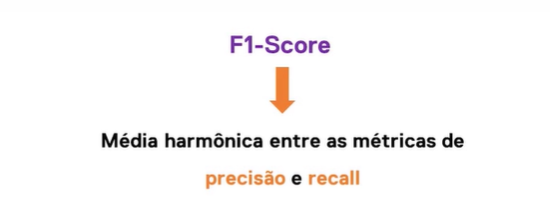

Fonte: Lead Dell

## Validação cruzada

Alternativa de amostragem de treino e teste. Para essa técnica é utilizado o **método k-fold**, que consiste me dividir o seu conjunto de dados entre grupos, em seguida escolhe de maneira aleatória um dos grupos para ser o grupo de validação ou teste.

A ideia é diminuir a possibilidade de algumas caracteristicas ficarem presas em uma amostra de treino ou teste, perdendo assim uma caracteristica relevante para o modelo. Assim, no fim todo os dados são utilizados para  trainos e teste.

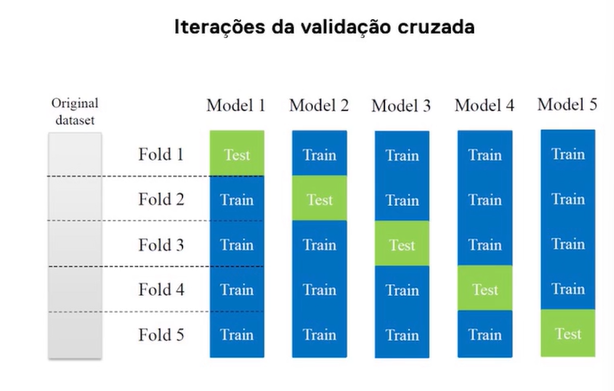

o valor dado a k indica como os dados serão divididos. O primeiro pedaço vira teste e o restante para criar o modelo, depois o segundo modelo pega o segundo pedaço para virar teste e o restante para criar o modelo e assim por diante. 

No final é utilizado a média da avaliação final para descobrir quão bom é o modelo no todo.

## Implementando a validação cruzada

In [14]:
from sklearn.dummy import DummyClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score


In [15]:
X,y = load_iris(return_X_y=True) 
dc = DummyClassifier(strategy='stratified')

In [20]:
# ao inves de usar a função fit e a score
cross_val_score(dc,X,y,cv=3)

array([0.42, 0.52, 0.32])

In [21]:
cross_val_score(dc,X,y,cv=3).mean()

0.3333333333333333

O número que dever ser colocado na divisão devem ser bem avaliado, e existe uma regra que define no minimo 10 elementos para teste e 1000 elementos para treino.
Para a maioria dos casos uma divisão entre 3 a 5 terá bons resultados.